# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Prediction texte partiel

---

# Initialisations
---

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Préparation Données

---

## Chargement

In [4]:
filename = 'data/demo/230526-df_ml.pickle'
df_ml = pd.read_pickle(filename)

In [5]:
df_ml

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,,...,0.0,0.0,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,857bfacdd98e36dda26f1f92cf40c992904d6386
705,708,https://www.profession-gendarme.com/la-vaccina...,www.profession-gendarme.com,La vaccination Covid : un marquage de « type b...,De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonjo...,"[Actualités, Tribune]",[De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonj...,,,NaN,...,NaN,NaN,NaN,NaN,Test1,17,La vaccination Covid : un marquage de « type b...,6252,367.764706,166d32300f4d7766a82fe39a1185f35bc347c05f
26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,Pangea Grandangolo,...,0.0,NaN,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,2a39a60fd5e2c6df0f6ec8ce9fedc2ee2eb4ab4d
565,566,https://www.francesoir.fr/opinions-editos/de-l...,www.francesoir.fr,De l’importance d’une Assemblée vraiment natio...,"Depuis hier soir, ne serions-nous pas en train...","[Accueil, Opinions]","[Depuis hier soir, ne serions-nous pas en trai...",2022-06-20T19:46:00,,Xavier Azalbert,...,0.0,NaN,,GP,Recueil,16,De l’importance d’une Assemblée vraiment natio...,4582,286.375000,93b25370fea82c7039f7e2b00c0bd73151101af3
231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",André Victor Robert,...,0.0,0.0,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,c12a81bb99810b5c13fba93abc5f9cea077a873d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,,...,0.0,0.0,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,1f56ed5fa54de7c492154ac8ee0d8d10724f1aa4
157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,,...,1.0,NaN,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,b3153ba0ad9e32c02a8d49c99a6748e0764b20b5
522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"[Politique, Vidéos, censure, jacinda ardern, ONU]",[L’argument principal de la ministre est que l...,2022-09-29T09:56:31+02:00,"Le terrible discours de Jacinda Ardern, Premie...",,...,0.0,0.0,1,FB,Recueil,7,ONU – Le Premier ministre de Nouvelle-Zélande ...,2420,345.714286,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb
847,853,https://fr.sott.net/article/36258-Pandemie-ou-...,fr.sott.net,Pandémie ou le retour du grand Pan,"Au cours des deux dernières décennies, les pub...",[La Science de l'Esprit],"[Au cours des deux dernières décennies, les pu...",,,NaN,...,NaN,NaN,NaN,NaN,Verif,59,Pandémie ou le retour du 

# Experience
---

## Paragraphes

In [6]:
df_ml['p_count'].describe()

count    746.000000
mean      22.741287
std       30.890347
min        1.000000
25%        8.000000
50%       14.000000
75%       26.000000
max      512.000000
Name: p_count, dtype: float64

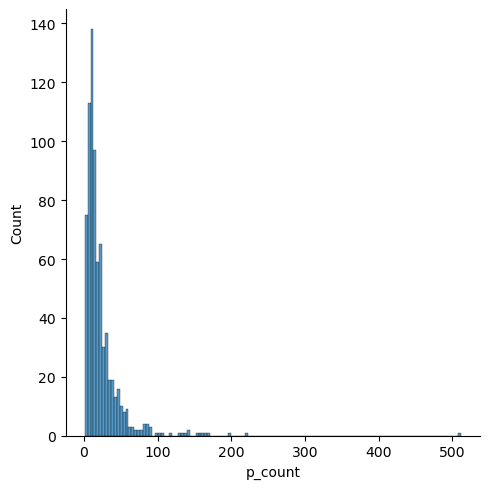

In [7]:
sns.displot(df_ml,x='p_count')

## Textes partiels

In [8]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [9]:
text = df_ml.sample(1).iloc[0]['text']

In [10]:
print(text)

De l’importance d’une Assemblée vraiment nationale
Depuis hier soir, ne serions-nous pas en train d’assister au grand retour du peuple à l’Assemblée nationale ? Avec le succès de la Nupes, la poussée historique du Rassemblement national et une majorité moins que relative pour Emmanuel Macron, le président réélu n’a pas donc pas réussi son pari le plus important : obtenir une majorité absolue de 289 sièges.
Ainsi va la vie. Lors du deuxième tour de l'élection présidentielle, Emmanuel Macron a été récemment réélu avec 58,5% des suffrages, devant Marine Le Pen avec un score de 41,5%. Cette « victoire » est intervenue suite à un appel à un barrage républicain soutenu par un tapage médiatique incessant, opéré de concert par tous les médias mainstream. Quant à Jean-Luc Mélenchon, au premier tour, il avait raté de peu la seconde marche du podium.
Les législatives de ce dimanche furent dès lors le troisième tour de l’élection présidentielle. Et leur résultat est une gifle cinglante pour la maj

In [12]:
pt = partial_texts(text,3)
print(pt)

De l’importance d’une Assemblée vraiment nationale
Depuis hier soir, ne serions-nous pas en train d’assister au grand retour du peuple à l’Assemblée nationale ? Avec le succès de la Nupes, la poussée historique du Rassemblement national et une majorité moins que relative pour Emmanuel Macron, le président réélu n’a pas donc pas réussi son pari le plus important : obtenir une majorité absolue de 289 sièges.
Ainsi va la vie. Lors du deuxième tour de l'élection présidentielle, Emmanuel Macron a été récemment réélu avec 58,5% des suffrages, devant Marine Le Pen avec un score de 41,5%. Cette « victoire » est intervenue suite à un appel à un barrage républicain soutenu par un tapage médiatique incessant, opéré de concert par tous les médias mainstream. Quant à Jean-Luc Mélenchon, au premier tour, il avait raté de peu la seconde marche du podium.


## Tests Entrainement

In [13]:
df_ml=df_ml.sample(frac=1,random_state=_rs)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [15]:
logreg = LogisticRegression(C=150, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=_rs)

In [16]:
iw=None
pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

In [17]:
def cut_text(text):
    return partial_texts(text,nb_parags)

In [18]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34,55,89]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_ml['text'].apply(cut_text)
    y = df_ml['infox']

    #classifier = pipelineMLPC
    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=5,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34
Crossvalidating nb_parags=55
Crossvalidating nb_parags=89


In [19]:
pd.set_option('display.precision',3)
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34,55,89
fit_time,0.028,0.063,0.093,0.148,0.219,0.292,0.379,0.439,0.506,0.530
score_time,0.005,0.010,0.016,0.026,0.038,0.055,0.071,0.089,0.096,0.101
test_roc_auc,0.679,0.802,0.791,0.825,0.834,0.846,0.849,0.851,0.855,0.853
test_f1,0.650,0.737,0.729,0.748,0.761,0.783,0.774,0.785,0.784,0.785
test_accuracy,0.637,0.732,0.725,0.747,0.756,0.781,0.771,0.783,0.783,0.784
test_precision,0.629,0.723,0.721,0.745,0.747,0.778,0.764,0.777,0.781,0.782
test_recall,0.675,0.753,0.737,0.754,0.778,0.788,0.786,0.794,0.788,0.788


<Axes: >

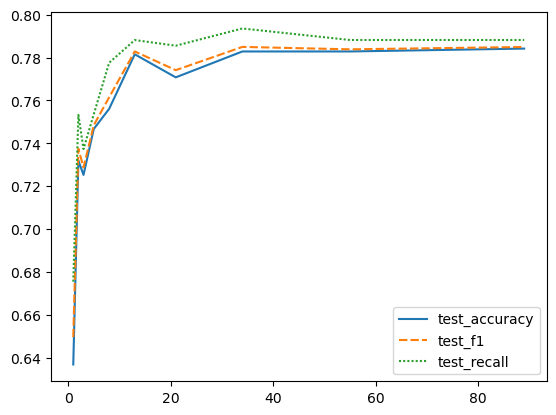

In [20]:
sns.lineplot(data=bench.T[['test_accuracy','test_f1','test_recall']])

<Axes: >

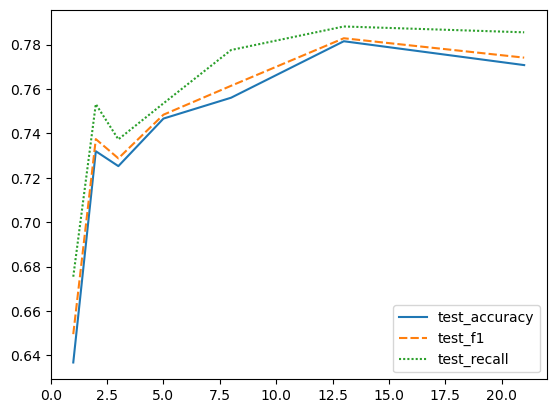

In [21]:
sns.lineplot(data=bench[[1,2,3,5,8,13,21]].T[['test_accuracy','test_f1','test_recall']])

<Axes: xlabel='test_accuracy', ylabel='test_recall'>

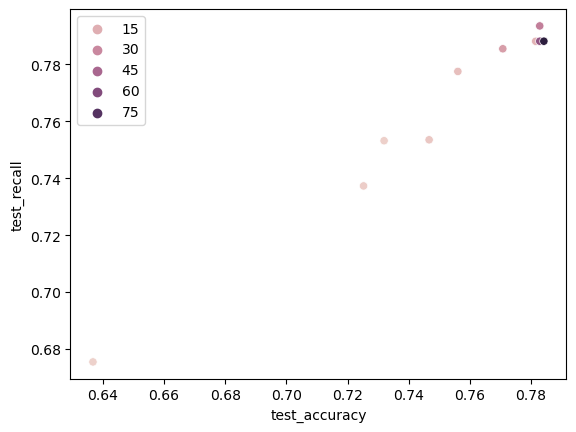

In [46]:
sns.scatterplot(data=bench.T,x='test_accuracy',y='test_recall',hue=bench.T.index)

# Conclusions
---